<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Covnets_Basics_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will split cat and dog images and give them their own directories training_set_cats and training_set_dogs. We will do this by looping through the directory and look for files that start with dog. This process will take a few hours as we need to process 25000 files

In [0]:
source = os.listdir('/content/drive/My Drive/Colab Notebooks/train/')

dst_1='/content/drive/My Drive/Colab Notebooks/training_dogs/'
dst_2='/content/drive/My Drive/Colab Notebooks/training_cats/'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/train')

In [0]:
for file in source:
  if file.startswith('dog.'):
    shutil.copy(file, dst_1)
  else:
    shutil.copy(file, dst_2)

In [113]:
list = os.listdir('/content/drive/My Drive/Colab Notebooks/training_cats') # dir is your directory path
number_files = len(list)
print(number_files)

12514


No we will set aside our training set of 1000 dogs and 1000 cats and store them in training_dogs_1000 and training_cats_1000

In [0]:
source_2 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_dogs/')[:1000]
source_3 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_cats/')[:1000]  
dst_3='/content/drive/My Drive/Colab Notebooks/training_2000/training_dogs_1000'
dst_4='/content/drive/My Drive/Colab Notebooks/training_2000/training_cats_1000'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_dogs')

In [0]:
for file in source_2:
  shutil.copy(file, dst_3)

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_cats')

In [0]:
for file in source_3:
  shutil.copy(file, dst_4)

No we will set aside our validation set of 500 dogs and 500 cats and store them in val_set_dogs_500 and val_set_cats_500

In [0]:
source_4 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_dogs/')[1000:1500]
source_5 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_cats/')[1000:1500]  
dst_5='/content/drive/My Drive/Colab Notebooks/val_1000/val_dogs_500/'
dst_6='/content/drive/My Drive/Colab Notebooks/val_1000/val_cats_500/'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_dogs')

In [0]:
for file in source_4:
  shutil.copy(file, dst_5)

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_cats')

In [0]:
for file in source_5:
  shutil.copy(file, dst_6)  

In [124]:
list = os.listdir('/content/drive/My Drive/Colab Notebooks/training_2000/training_dogs_1000') # dir is your directory path
number_files = len(list)
print(number_files)

1000


No we will set aside our test set of 500 dogs and 500 cats in test_set_dogs_500 and test_set_cats_500

In [0]:
source_6 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_dogs')[1500:2000] # 500 items
source_7 = os.listdir('/content/drive/My Drive/Colab Notebooks/training_cats')[1500:2000]
dst_7='/content/drive/My Drive/Colab Notebooks/test_1000/test_dogs_500'
dst_8='/content/drive/My Drive/Colab Notebooks/test_1000/test_cats_500'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_dogs/')

In [0]:
for file in source_6:
  shutil.copy(file, dst_7)

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/training_cats/')

In [0]:
for file in source_7:
  shutil.copy(file, dst_8)

In [130]:
list = os.listdir('/content/drive/My Drive/Colab Notebooks/training_2000/training_dogs_1000') # dir is your directory path
number_files = len(list)
print(number_files)

1000


In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Generator allows you to loop over the training data in pieces(batches), avoiding large memory consumption when you load the entire training set at once

In [133]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Generators are objects that act as an iterator (for loop). However the generator yields batches indefinitely and we need to break the loop at some point. In our case the train and val generators will yield batches of inputs and targets indefinitely. However we need to know how many samples to draw from the dataset before declaring the epoch is over. The steps_per_epoch argument takes care of this. In our case we have 2000 inputs and it will take 100 x 20 steps to finish 1 epoch.

In [134]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=20)

Epoch 1/30
100/100 [==============================] - 109s 1s/step - loss: 0.6932 - acc: 0.5385 - val_loss: 0.6758 - val_acc: 0.5775
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.6648 - acc: 0.5960 - val_loss: 0.6573 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 111s 1s/step - loss: 0.6260 - acc: 0.6485 - val_loss: 0.6688 - val_acc: 0.6050
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.5928 - acc: 0.6785 - val_loss: 0.6057 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.5560 - acc: 0.7170 - val_loss: 0.6067 - val_acc: 0.6775
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.5324 - acc: 0.7400 - val_loss: 0.5551 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.4974 - acc: 0.7525 - val_loss: 0.5703 - val_acc: 0.7025
Epoch 8/30
100/100 [==============================] - 109s 1s/step - 

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

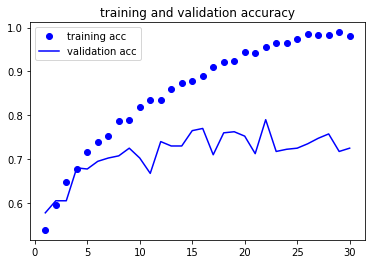

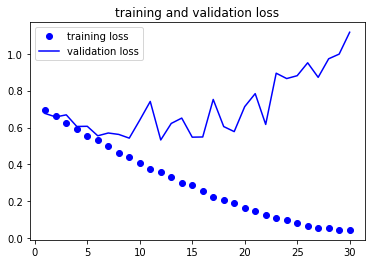

In [137]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()